In [2]:

import sys 
import os 

import matplotlib as mpl
#mpl.use('agg')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from math import atan2

from massPy import archive 
from massPy.base_modules import flow as flow
from massPy.base_modules import plotlib as plotlib

## Set plotting style and print options
plt.style.use('sg_article')
np.set_printoptions(precision = 5, suppress=1e-10)

In [3]:
def energy_spectral_density(Fx):
    # fast fourier transform (complex field)
    psi_fft = np.fft.fft2(Fx)
    # unit-wave vector
    k_hat = (     np.fft.fftfreq(psi_fft.shape[0])[:,None] * psi_fft.shape[0]
             + 1J*np.fft.fftfreq(psi_fft.shape[1])[None,:] * psi_fft.shape[1] )
    k_nrm = np.abs(k_hat)
    np.divide(k_hat, k_nrm, out=k_hat, where=k_nrm!=0)
    k_nrm = k_nrm.flatten()
    
    k_max = min(Fx.shape)//2 + 1 
    kbins = np.arange(.5, k_max, 1.)
    kvals = .5 * (kbins[1:] + kbins[:-1])
    
    psi2_fft = (np.abs(psi_fft)**2).flatten()
    Ek, _, _ = stats.binned_statistic(k_nrm, psi2_fft, statistic="mean", bins=kbins)
    
    return Ek, kvals

def rotate_vector_grid(x, y, angle_rad):
    # Create the rotation matrix
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)
    
    # Apply the rotation for each element of x and y
    x_rot = cos_theta * x - sin_theta * y
    y_rot = sin_theta * x + cos_theta * y
    
    return x_rot, y_rot

def shift_matrix(matrix, i, j):
    
    return np.roll(np.roll(matrix, -i, axis=0), -j, axis=1)

def modify_dat_file(filename, alpha, zeta, xi):
    with open(filename, 'r') as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        if line.startswith('alpha'):
            lines[i] = f'alpha\t = {alpha}\n'
        elif line.startswith('zeta'):
            lines[i] = f'zeta\t = {zeta}\n'
        elif line.startswith('xi'):
            lines[i] = f'xi\t = {xi}\n'

    with open(filename, 'w') as file:
        file.writelines(lines)

In [25]:
def energy_spectral_density(Fx):
    # fast fourier transform (complex field)
    psi_fft = np.fft.fft2(Fx)
    # unit-wave vector
    k_hat = (     np.fft.fftfreq(psi_fft.shape[0])[:,None] * psi_fft.shape[0]
             + 1J*np.fft.fftfreq(psi_fft.shape[1])[None,:] * psi_fft.shape[1] )
    k_nrm = np.abs(k_hat)

    print("\n", k_hat)
    print(k_nrm)

    np.divide(k_hat, k_nrm, out=k_hat, where=k_nrm!=0)
    k_nrm = k_nrm.flatten()


    
    k_max = min(Fx.shape)//2 + 1 
    print("km", k_max)
    kbins = np.arange(.5, k_max, 1.)
    kvals = .5 * (kbins[1:] + kbins[:-1])
    
    psi2_fft = (np.abs(psi_fft)**2).flatten()
    Ek, _, _ = stats.binned_statistic(k_nrm, psi2_fft, statistic="mean", bins=kbins)
    
    return Ek, kvals

In [20]:
Pz, kvals

(array([57643.01507, 10435.46585,  4005.29902,  1382.38596,  1334.2555 ]),
 array([1., 2., 3., 4., 5.]))

In [33]:
plt.plot(kvals,Pz)
plt.show()

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_10948\3929664134.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [32]:
kvals.shape, Pz

((5,),
 array([ 4342.23253, 13698.41952,   880.09739,   305.2197 ,   138.31446]))

In [6]:
2*np.pi/100

0.06283185307179587

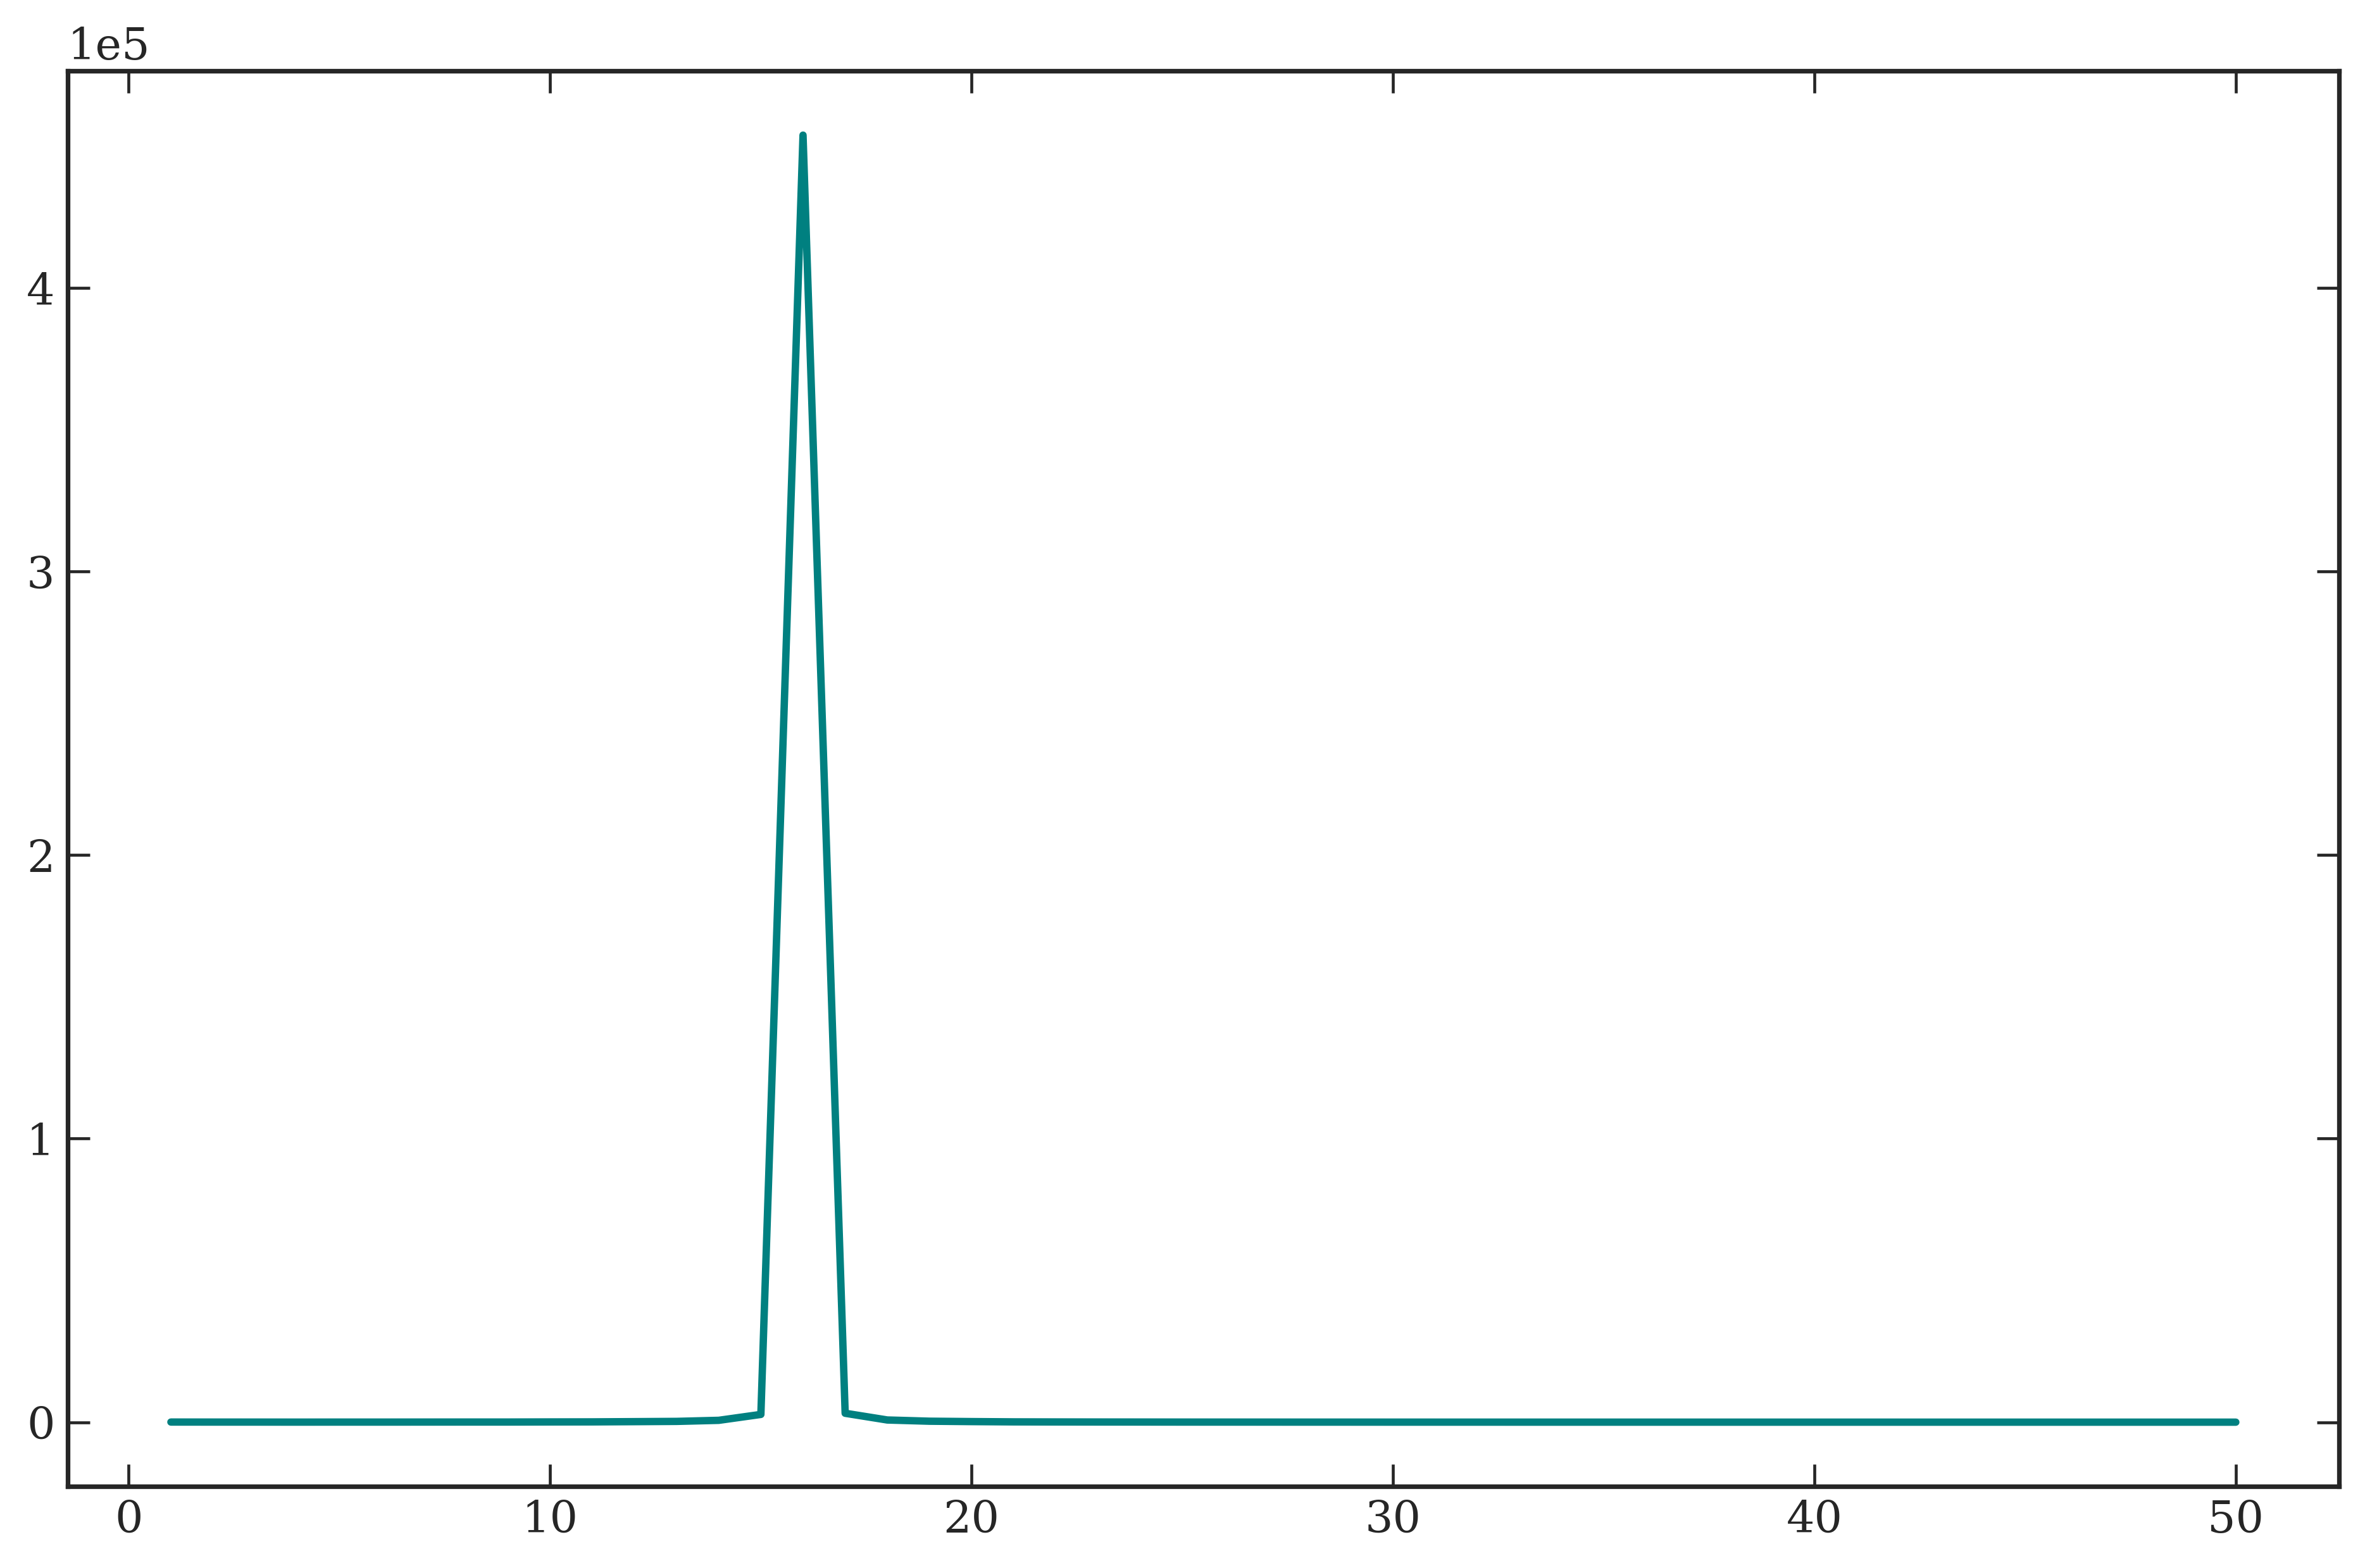

In [32]:
xvals = np.linspace(0,100,101)
X, Y = np.meshgrid(xvals, xvals)
Z =  np.sin(X) #* np.cos(Y)
Pz, kvals = energy_spectral_density(Z)
Pz.shape, kvals.shape
plt.plot(kvals,Pz)

In [28]:
psi_fft = np.fft.fft2(Z)
    ## unit-wave vector
k_hat = (     np.fft.fftfreq(psi_fft.shape[0])[:,None] * psi_fft.shape[0]
    #          1J*np.fft.fftfreq(psi_fft.shape[1])[None,:] * psi_fft.shape[1] )
    #
    # k_nrm = np.abs(k_hat)
#psi_fft.shape

(11, 11)

In [10]:
ks=2*np.pi/t

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11968\4059698331.py:1: RuntimeWarning: divide by zero encountered in divide
  ks=2*np.pi/t


In [11]:
ks

array([    inf, 6.28319, 3.14159, 2.0944 , 1.5708 , 1.25664, 1.0472 ,
       0.8976 , 0.7854 , 0.69813, 0.62832, 0.5712 , 0.5236 , 0.48332,
       0.4488 , 0.41888, 0.3927 , 0.3696 , 0.34907, 0.33069, 0.31416,
       0.2992 , 0.2856 , 0.27318, 0.2618 , 0.25133, 0.24166, 0.23271,
       0.2244 , 0.21666, 0.20944, 0.20268, 0.19635, 0.1904 , 0.1848 ,
       0.17952, 0.17453, 0.16982, 0.16535, 0.16111, 0.15708, 0.15325,
       0.1496 , 0.14612, 0.1428 , 0.13963, 0.13659, 0.13368, 0.1309 ,
       0.12823, 0.12566, 0.1232 , 0.12083, 0.11855, 0.11636, 0.11424,
       0.1122 , 0.11023, 0.10833, 0.10649, 0.10472, 0.103  , 0.10134,
       0.09973, 0.09817, 0.09666, 0.0952 , 0.09378, 0.0924 , 0.09106,
       0.08976, 0.0885 , 0.08727, 0.08607, 0.08491, 0.08378, 0.08267,
       0.0816 , 0.08055, 0.07953, 0.07854, 0.07757, 0.07662, 0.0757 ,
       0.0748 , 0.07392, 0.07306, 0.07222, 0.0714 , 0.0706 , 0.06981,
       0.06905, 0.0683 , 0.06756, 0.06684, 0.06614, 0.06545, 0.06478,
       0.06411, 0.06

In [9]:
freq

array([ 0.     ,  0.00391,  0.00781,  0.01172,  0.01562,  0.01953,
        0.02344,  0.02734,  0.03125,  0.03516,  0.03906,  0.04297,
        0.04688,  0.05078,  0.05469,  0.05859,  0.0625 ,  0.06641,
        0.07031,  0.07422,  0.07812,  0.08203,  0.08594,  0.08984,
        0.09375,  0.09766,  0.10156,  0.10547,  0.10938,  0.11328,
        0.11719,  0.12109,  0.125  ,  0.12891,  0.13281,  0.13672,
        0.14062,  0.14453,  0.14844,  0.15234,  0.15625,  0.16016,
        0.16406,  0.16797,  0.17188,  0.17578,  0.17969,  0.18359,
        0.1875 ,  0.19141,  0.19531,  0.19922,  0.20312,  0.20703,
        0.21094,  0.21484,  0.21875,  0.22266,  0.22656,  0.23047,
        0.23438,  0.23828,  0.24219,  0.24609,  0.25   ,  0.25391,
        0.25781,  0.26172,  0.26562,  0.26953,  0.27344,  0.27734,
        0.28125,  0.28516,  0.28906,  0.29297,  0.29688,  0.30078,
        0.30469,  0.30859,  0.3125 ,  0.31641,  0.32031,  0.32422,
        0.32812,  0.33203,  0.33594,  0.33984,  0.34375,  0.34

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11968\2440225656.py:5: RuntimeWarning: divide by zero encountered in divide
  kvals = 2 * np.pi / t


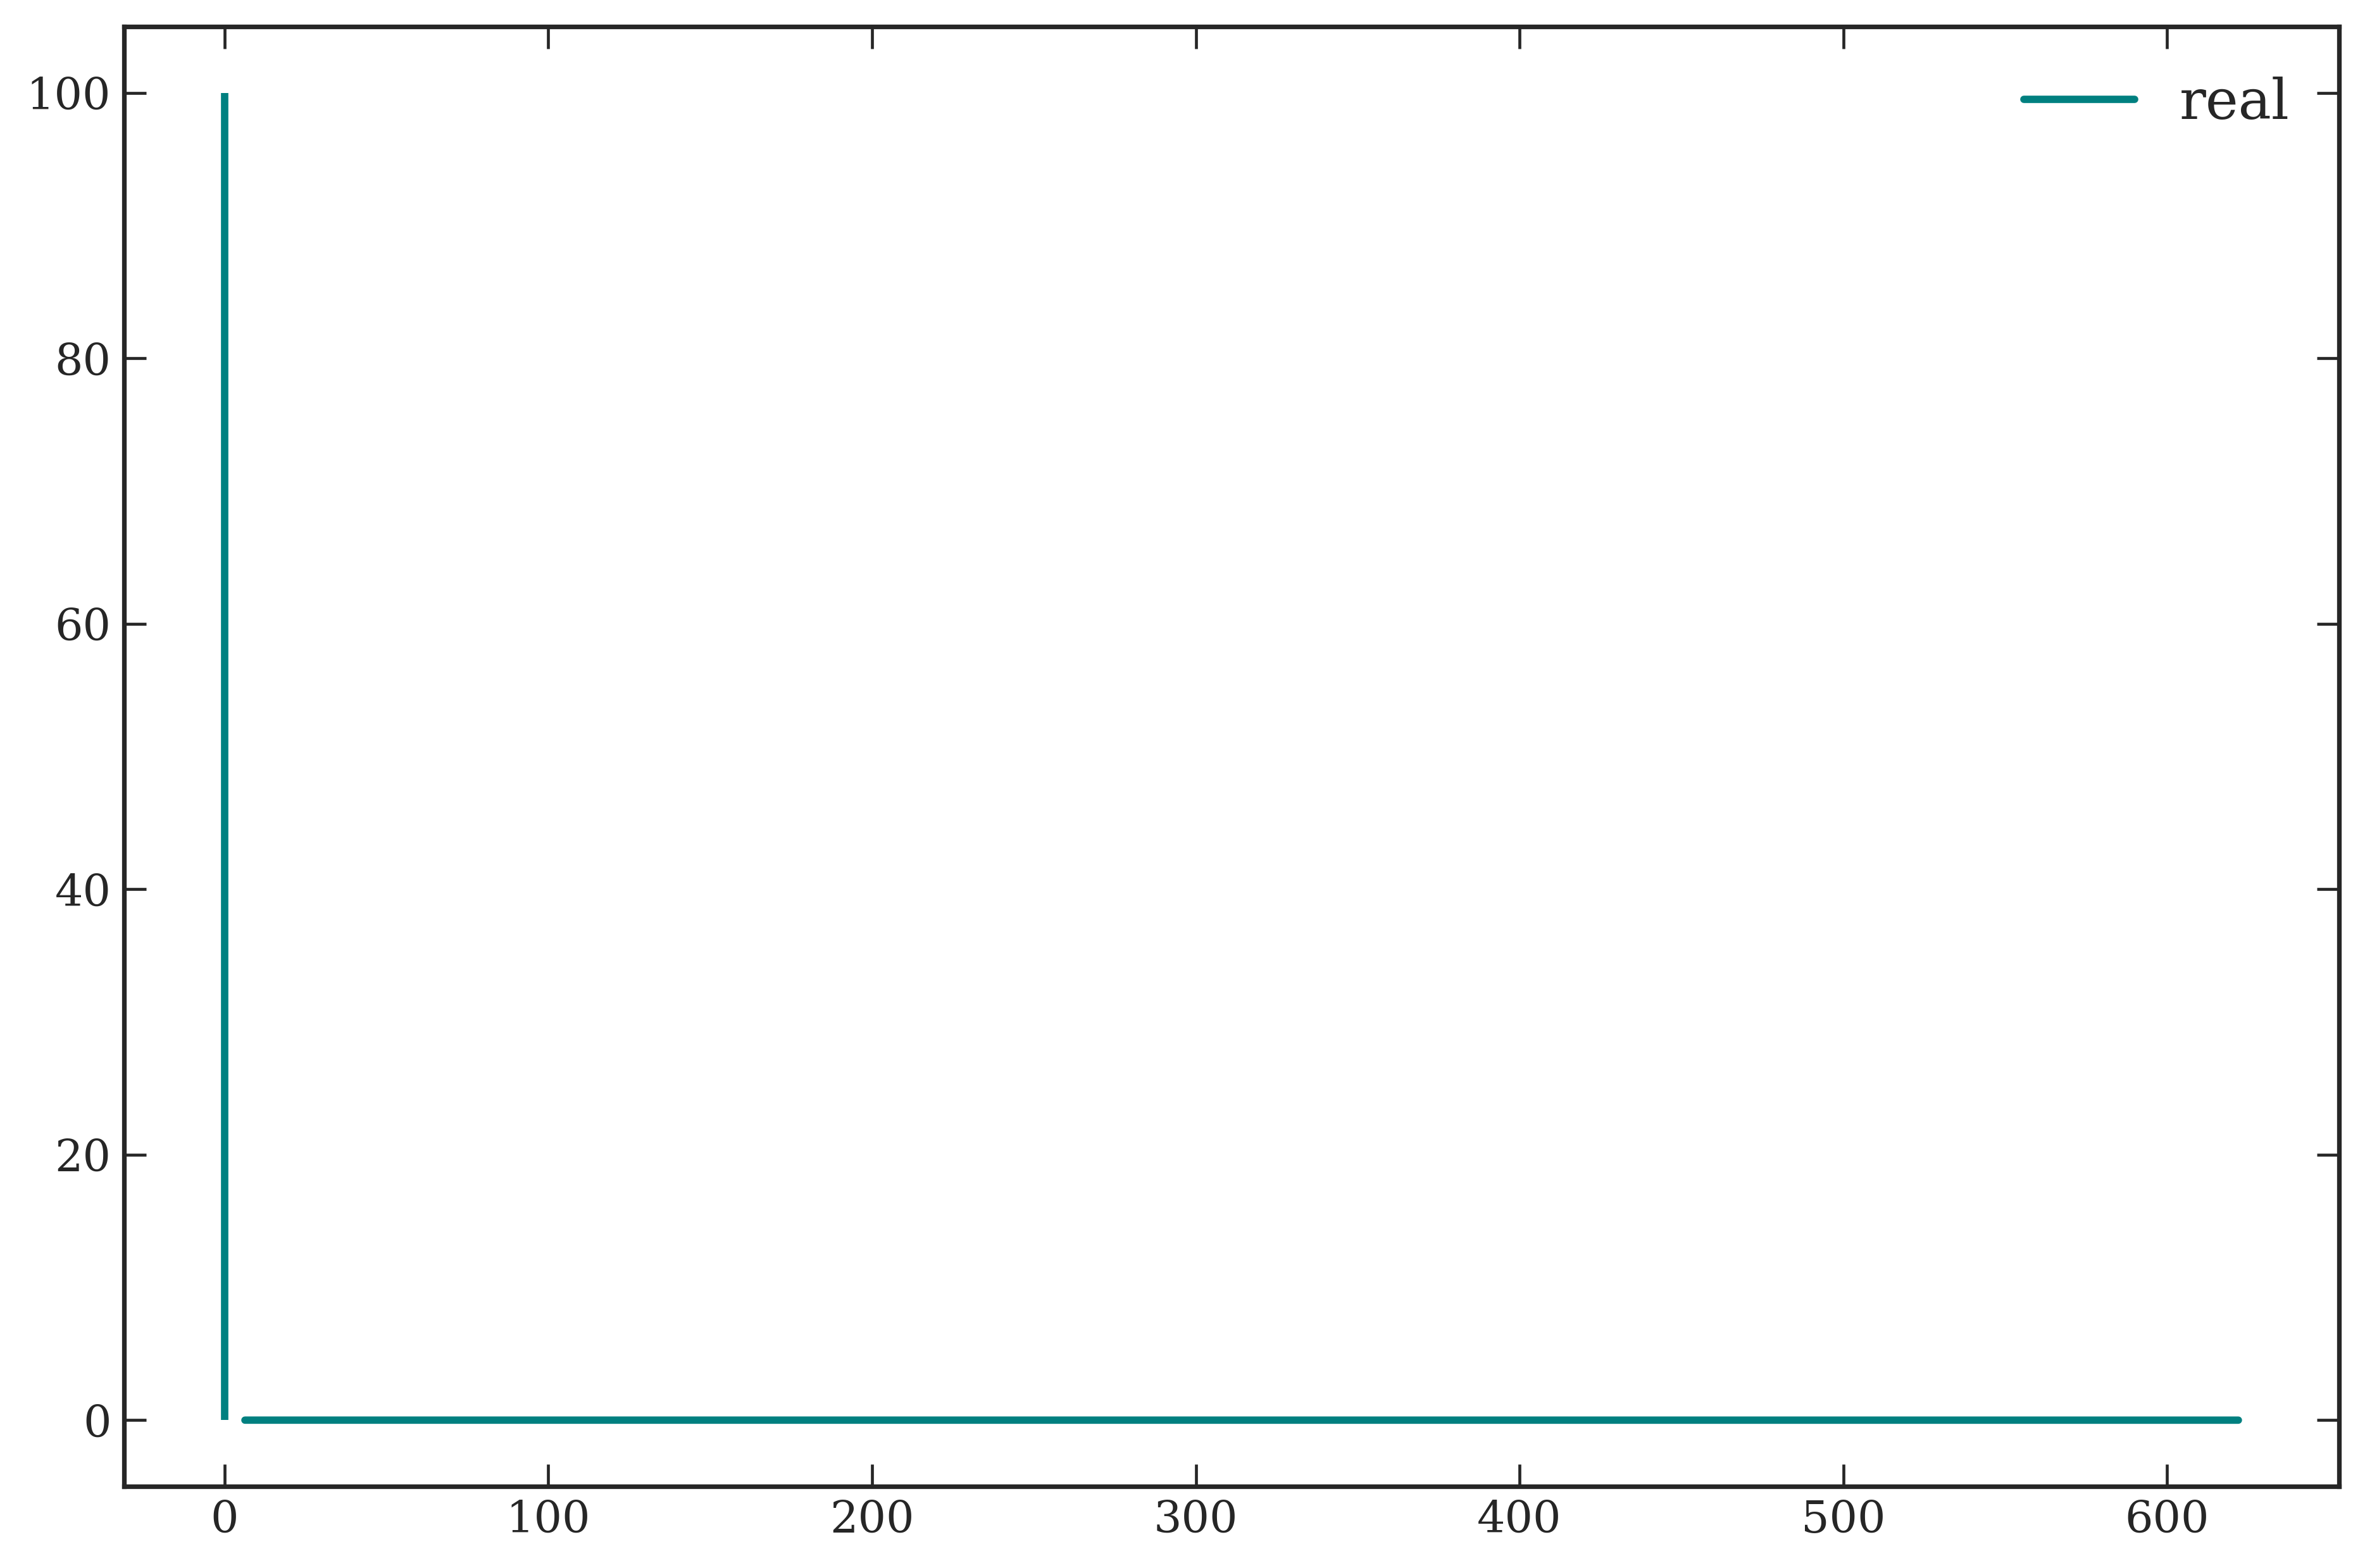

In [31]:
L = 256
lamb = 1
t = np.arange(0, L+1, 1)
t = np.linspace(0,1,100)
kvals = 2 * np.pi / t
sp = np.fft.fft(np.cos(2*np.pi* t / L)) #2*np.pi*t/L))
#kvals = L/(2*t) #2*np.pi/t * L
psi_fft = np.fft.fft2(Z)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(kvals, sp.real, label='real',)
#plt.plot(freq, sp.imag,'--', label='img',lw=1)
#plt.plot(freq, sp.real,'--', label='real',lw=1)
plt.vlines(2*np.pi/L, 0, 100)   
plt.legend()
#plt.xlim(0,.2)

In [12]:
1/(2*np.pi) 

0.15915494309189535